In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express

%matplotlib inline
pd.set_option('display.max_columns', None)

train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')


In [53]:
train_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [54]:
test_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,41.452464,174.725624,75.147712,15.415428,95.479084,40.036093
std,72168.927986,15.177769,12.822039,13.979513,8.349133,9.450161,0.778448
min,750000.000000,20.000000,127.000000,39.000000,1.000000,67.000000,37.100000
25%,812499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,874999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,937499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,999999.000000,79.000000,219.000000,126.000000,30.000000,128.000000,41.500000


In [55]:
train_df.isnull().sum()



id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [51]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Create subplots
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=('Calories Distribution', 'Duration Distribution', 
                                   'Heart Rate Distribution', 'Body Temperature Distribution'))

# Add traces for each distribution
fig.add_trace(
    ff.create_distplot([[train_df['Calories'].values]], ['Calories']),
    row=1, col=1
)

fig.add_trace(
    ff.create_distplot([[train_df['Duration'].values]], ['Duration']),
    row=1, col=2
)

fig.add_trace(
    ff.create_distplot([[train_df['Heart_Rate'].values]], ['Heart Rate']),
    row=2, col=1
)

fig.add_trace(
    ff.create_distplot([[train_df['Body_Temp'].values]], ['Body Temperature']),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800, 
    width=1200,
    showlegend=False
)

fig.show()

ValueError: points have dimension 500, dataset has dimension 1

Text(0.5, 1.0, 'Body Temperature vs Calories')

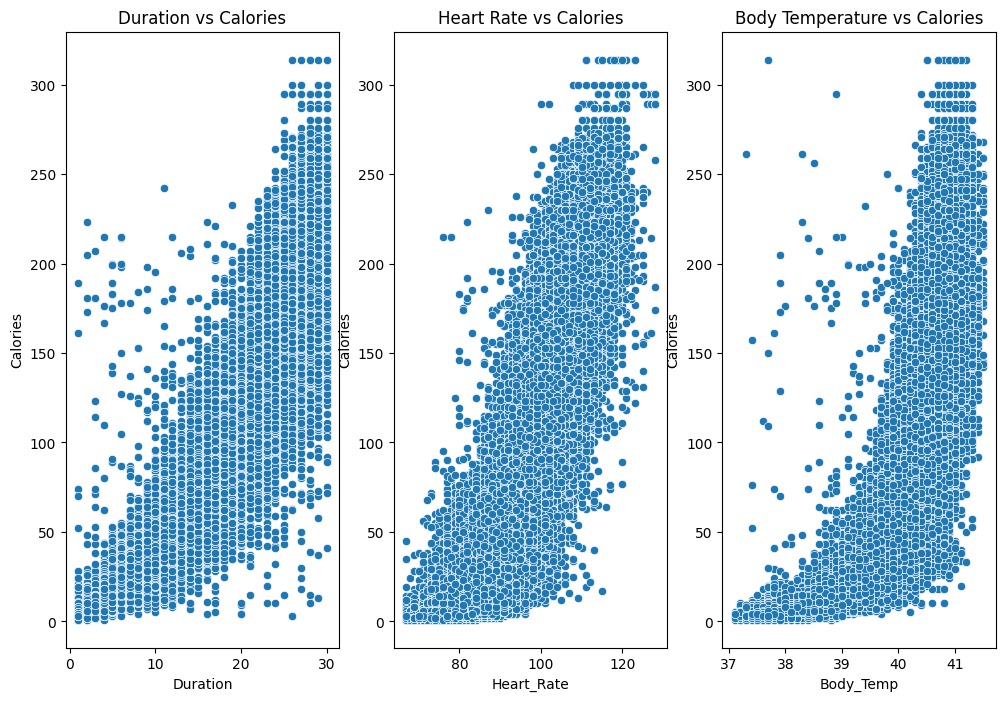

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
sns.scatterplot(x='Duration', y='Calories', data=train_df, ax=axes[0])
axes[0].set_title('Duration vs Calories')

sns.scatterplot(x='Heart_Rate', y='Calories', data=train_df, ax=axes[1])
axes[1].set_title('Heart Rate vs Calories')

sns.scatterplot(x='Body_Temp', y='Calories', data=train_df, ax=axes[2])
axes[2].set_title('Body Temperature vs Calories')






In [ ]:
train_df.replace('male', 1, inplace=True)
train_df.replace('female', 0, inplace=True)
train_df.corr()







C:\Users\Jon\AppData\Local\Temp\ipykernel_18924\2904663311.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,1.000000,-0.000065,0.002330,0.000101,0.000524,0.001647,0.001092,0.001612,0.001148
Sex,-0.000065,1.000000,0.009689,0.755906,0.818250,-0.009594,0.009122,-0.015933,0.012011
Age,0.002330,0.009689,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683
Height,0.000101,0.755906,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,0.000524,0.818250,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.001647,-0.009594,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,0.001092,0.009122,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.001612,-0.015933,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,0.001148,0.012011,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


<Axes: >

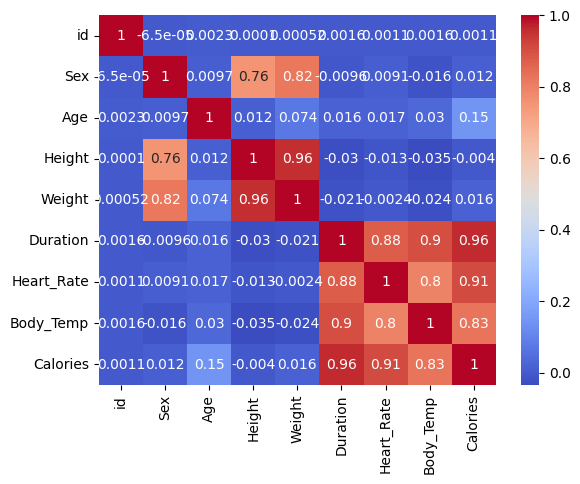

In [ ]:
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
